In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
data= pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [4]:
df= data

In [5]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015



1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Convert categorical features to numerical using one-hot encoding

# Handling missing values (if any)
df.dropna(inplace=True)


In [8]:
# Summary statistics
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

<Figure size 1000x600 with 0 Axes>

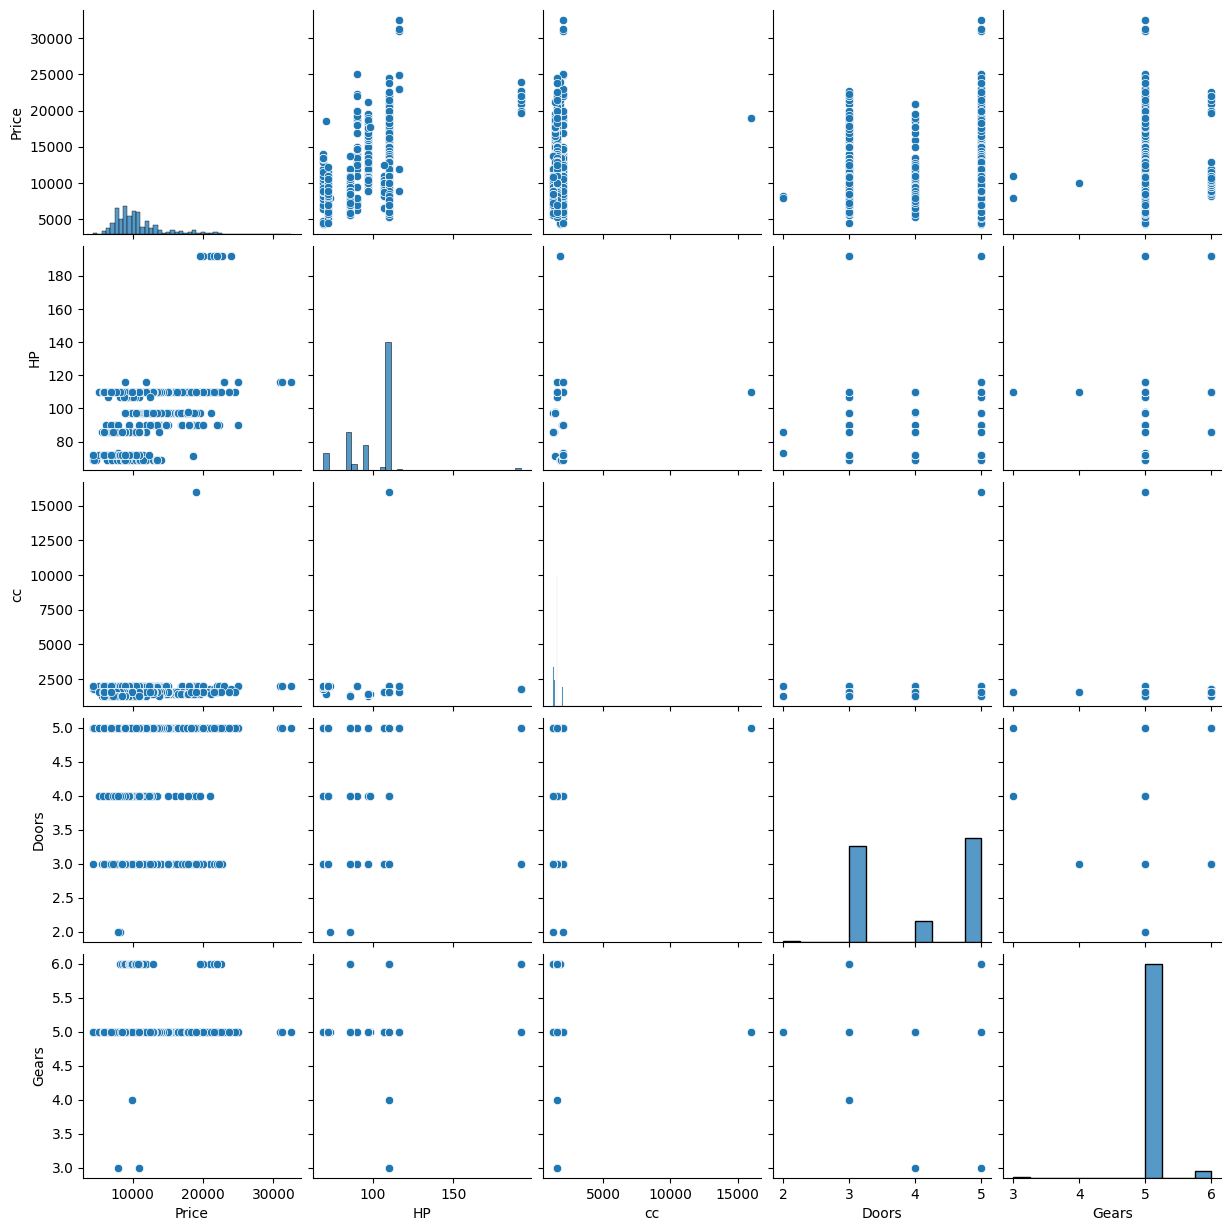

In [9]:
# Visualizations
# Updating the columns for pairplot to use existing columns
plt.figure(figsize=(10, 6))
sns.pairplot(df[['Price', 'HP', 'cc', 'Doors', 'Gears']]) # Removed dropped columns
plt.show()

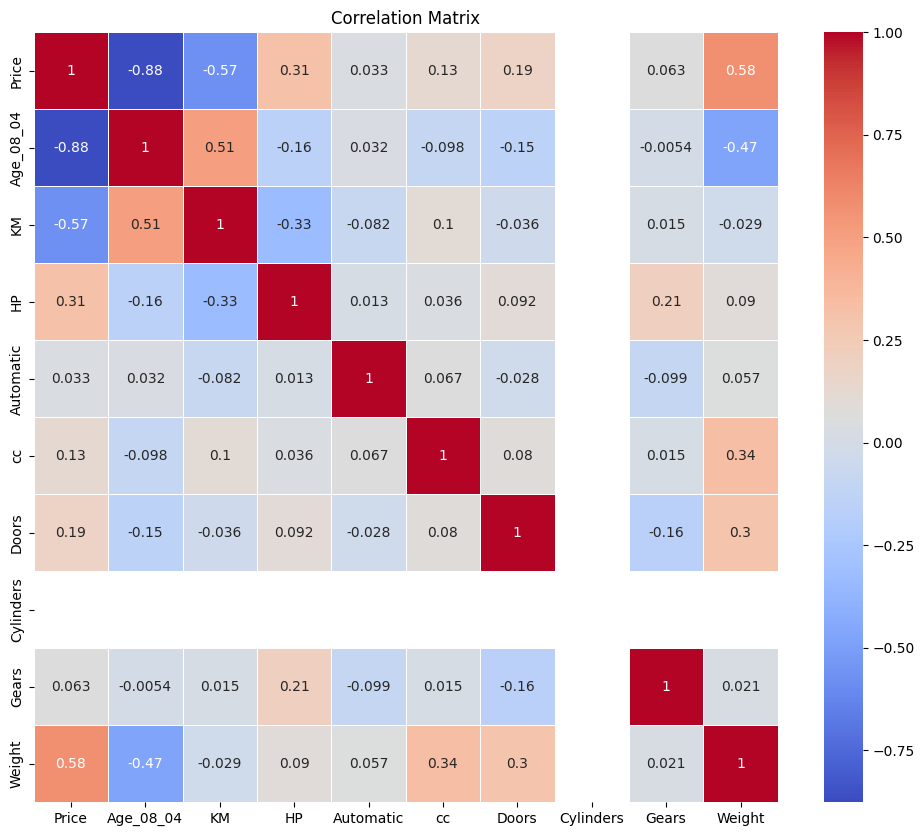

In [13]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
# Include numeric_only=True to calculate correlation only for numeric columns
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

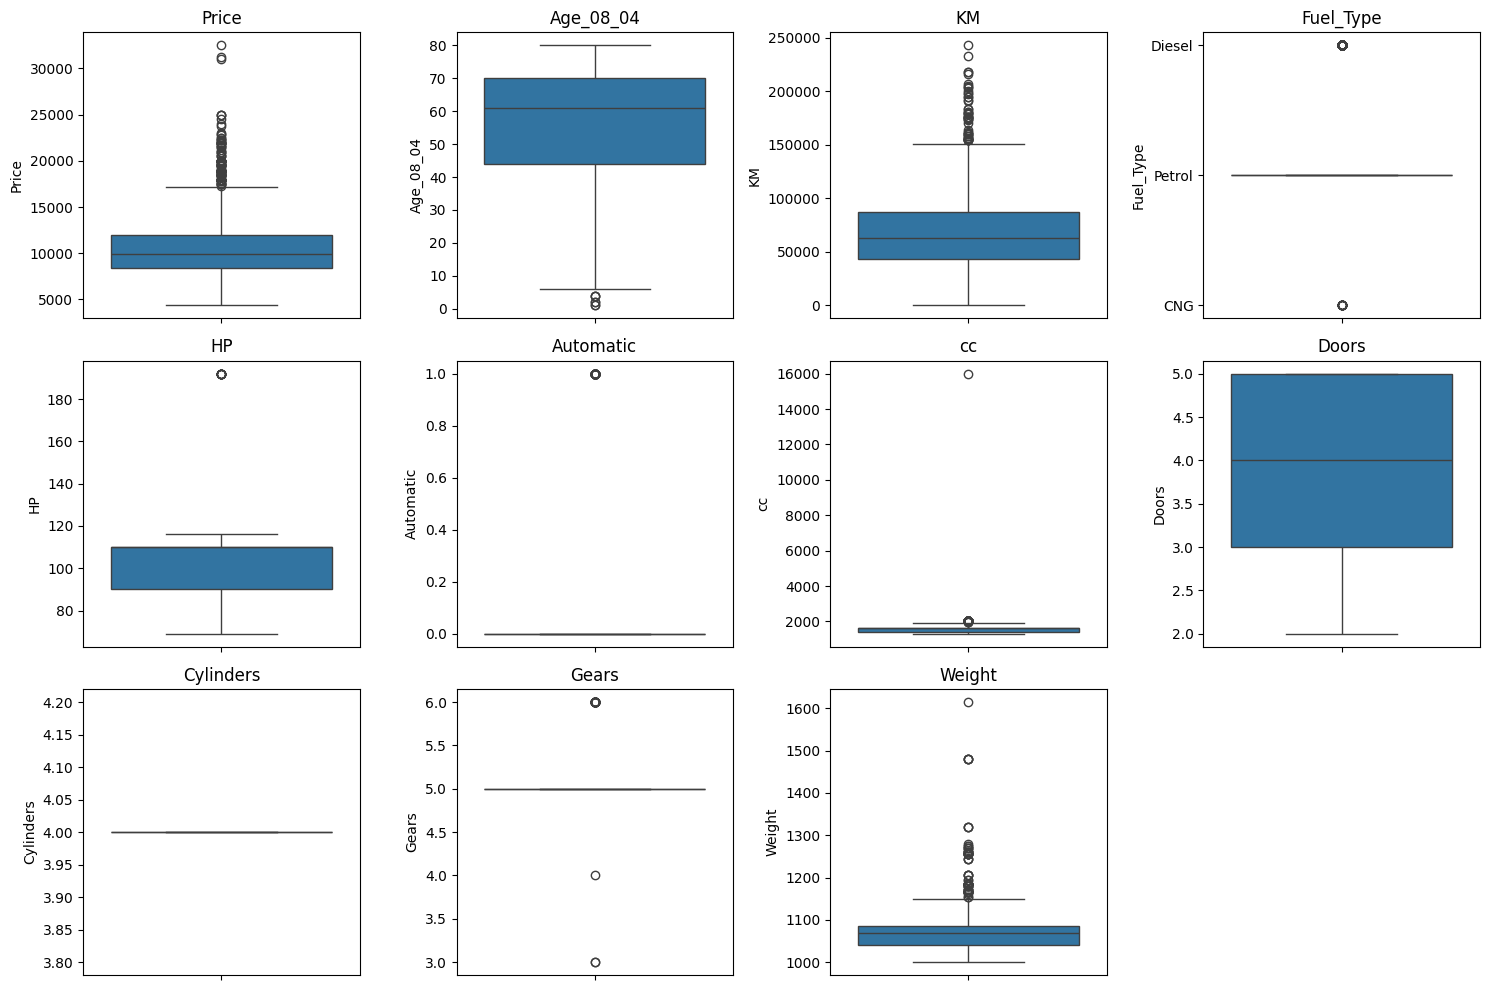

In [14]:
# Box plots to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i+1)  # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout() #avoid overlapping titles

plt.show()

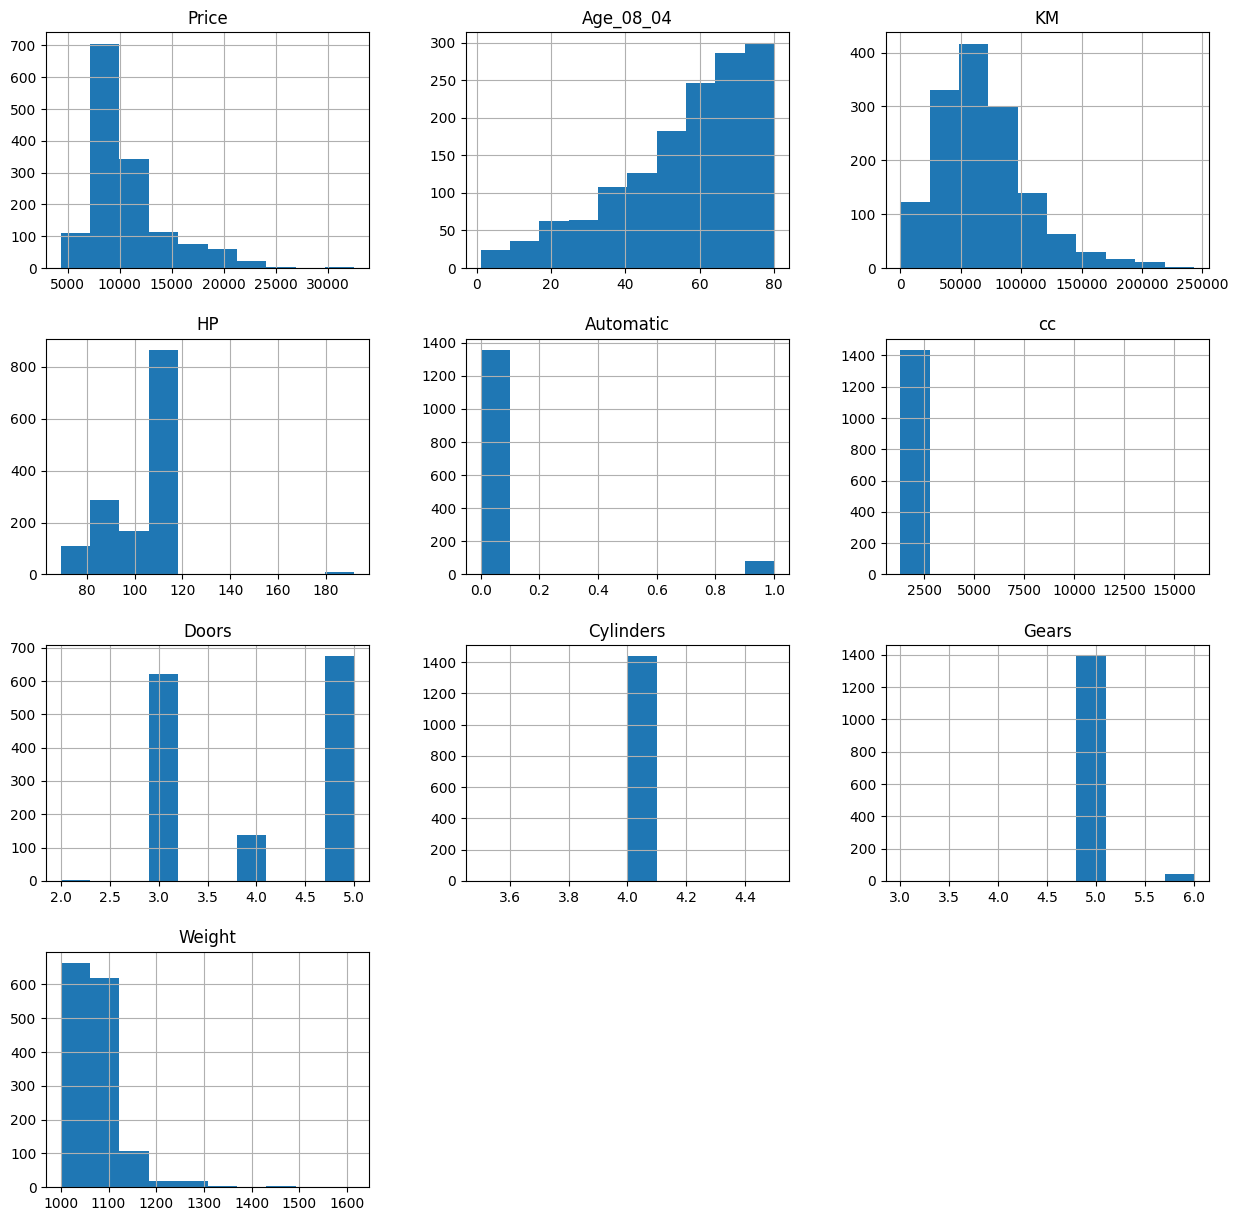

In [15]:
# Histograms for numerical variables
df.hist(figsize=(15,15))
plt.show()

In [17]:
# Check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['Price']) # Independent variables
# Select only numeric columns for VIF calculation
X = X.select_dtypes(include=np.number)  # This line is added
variables = X.columns
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = variables
print(vif)

           VIF   Features
0     1.909676  Age_08_04
1     1.679142         KM
2     1.218066         HP
3     1.047677  Automatic
4     1.150898         cc
5     1.155484      Doors
6  1378.328904  Cylinders
7     1.109188      Gears
8     1.664910     Weight


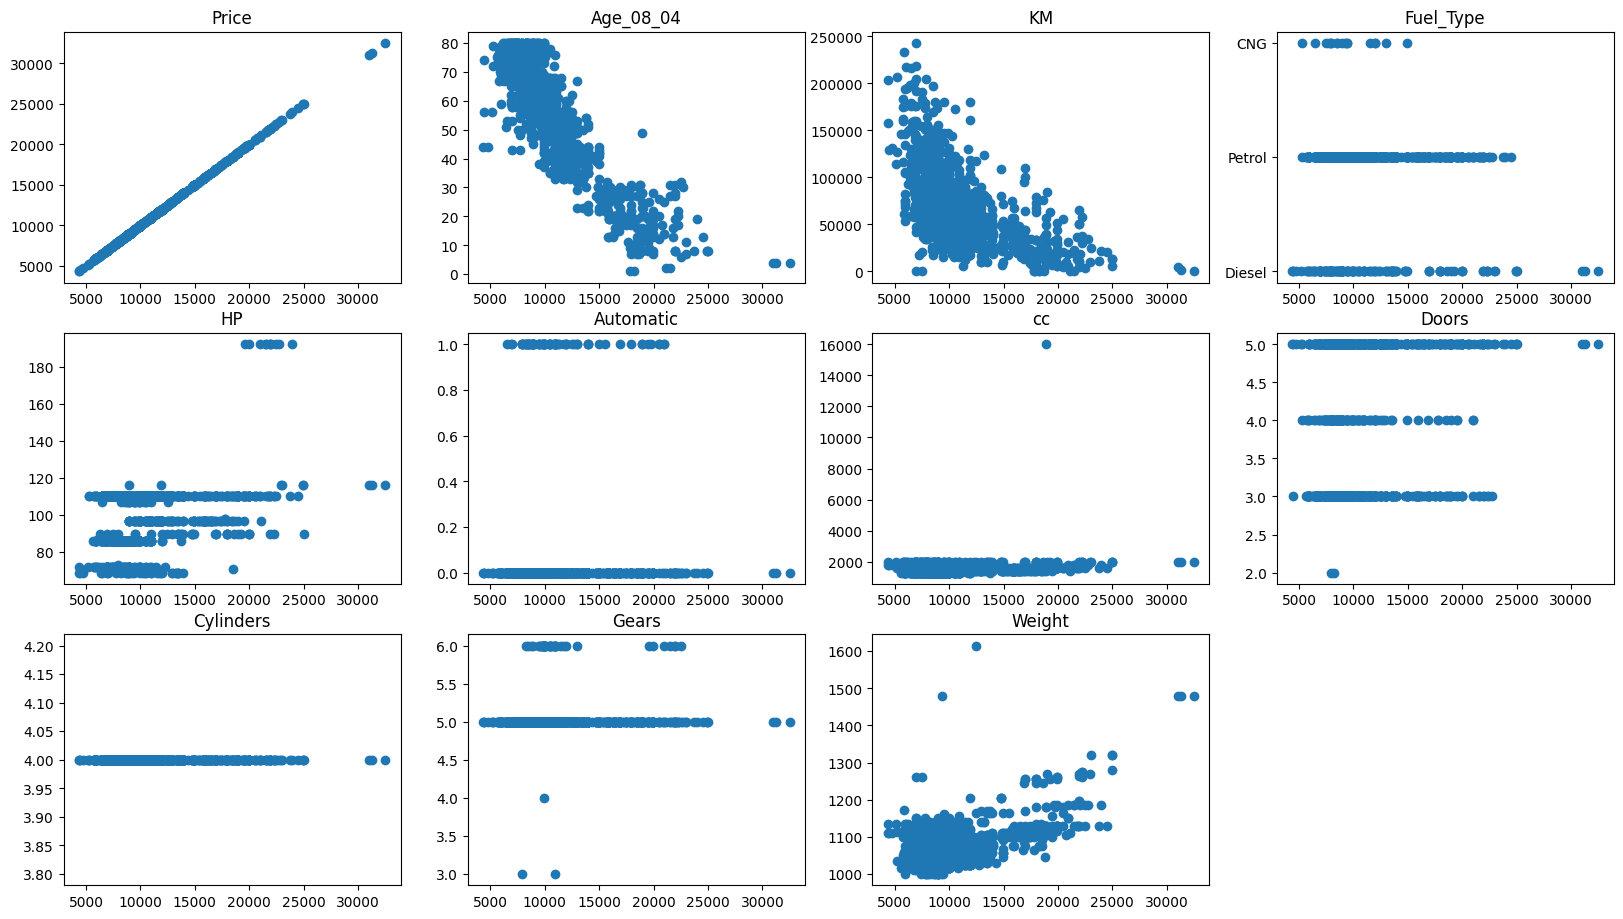

In [18]:

# Scatter plots to analyze the relationship between variables
plt.figure(figsize=(20,15))
for i, col in enumerate(df.columns):
  plt.subplot(4,4, i+1)
  plt.scatter(df['Price'], df[col])
  plt.title(col)

plt.show()

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [51]:
from sklearn.model_selection import train_test_split

# Assuming 'Price' is your target variable and the rest are features
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Now you can use X_train, X_test, y_train, and y_test for model training and evaluation
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1148, 10) (288, 10) (1148,) (288,)


3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Select numerical features for modeling (excluding 'Price')
numerical_cols = df.select_dtypes(include=np.number).drop('Price', axis=1).columns
X = df[numerical_cols]
y = df['Price']

# Split data (already done in your code)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build and evaluate a model
def build_and_evaluate_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model,mse,r2

In [35]:
# Model 1: All numerical features
model1, mse1, r2_1 = build_and_evaluate_model(X_train, y_train, X_test, y_test)
print("Model 1 (All Numerical Features):")
print(f"Mean Squared Error: {mse1}")
print(f"R-squared: {r2_1}")
print("Coefficients:", model1.coef_) #Coefficients

Model 1 (All Numerical Features):
Mean Squared Error: 1970126.6288130241
R-squared: 0.8523452141908858
Coefficients: [-1.20783137e+02 -1.99862732e-02  2.74291099e+01  3.71208703e+02
 -1.13513559e-01  7.53546778e+00  3.18323146e-12  6.26418444e+02
  1.98431383e+01]


In [37]:
# Model 2: Selected features (example: 'Age', 'KM', 'HP')
selected_features = ['Age_08_04', 'KM', 'HP']
X2_train = X_train[selected_features]
X2_test = X_test[selected_features]
model2, mse2, r2_2 = build_and_evaluate_model(X2_train, y_train, X2_test, y_test)

print("\nModel 2 (Selected Features):")
print(f"Mean Squared Error: {mse2}")
print(f"R-squared: {r2_2}")
print("Coefficients:", model2.coef_)


Model 2 (Selected Features):
Mean Squared Error: 2530780.7798339287
R-squared: 0.8103259513824549
Coefficients: [-1.53696216e+02 -1.13134865e-02  3.46719655e+01]


In [39]:
# Model 3: Scaled features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model3, mse3, r2_3 = build_and_evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test)
print("\nModel 3 (Scaled Features):")
print(f"Mean Squared Error: {mse3}")
print(f"R-squared: {r2_3}")
print("Coefficients:", model3.coef_)


Model 3 (Scaled Features):
Mean Squared Error: 1970126.6288130337
R-squared: 0.852345214190885
Coefficients: [-2.26640683e+03 -7.53150324e+02  4.07055792e+02  8.57920743e+01
 -5.29289891e+01  7.18023193e+00  1.01607611e-12  1.24171076e+02
  1.00945914e+03]


In [40]:
# Interpretation of Coefficients
# For example, interpret coefficients of Model 1:
print("\nInterpretation of Model 1 Coefficients:")
for i, coef in enumerate(model1.coef_):
    print(f"{numerical_cols[i]}: A one-unit increase in {numerical_cols[i]} is associated with a {coef:.2f} change in Price.")


Interpretation of Model 1 Coefficients:
Age_08_04: A one-unit increase in Age_08_04 is associated with a -120.78 change in Price.
KM: A one-unit increase in KM is associated with a -0.02 change in Price.
HP: A one-unit increase in HP is associated with a 27.43 change in Price.
Automatic: A one-unit increase in Automatic is associated with a 371.21 change in Price.
cc: A one-unit increase in cc is associated with a -0.11 change in Price.
Doors: A one-unit increase in Doors is associated with a 7.54 change in Price.
Cylinders: A one-unit increase in Cylinders is associated with a 0.00 change in Price.
Gears: A one-unit increase in Gears is associated with a 626.42 change in Price.
Weight: A one-unit increase in Weight is associated with a 19.84 change in Price.


4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [41]:
from sklearn.model_selection import train_test_split

# Assuming 'Price' is your target variable and the rest are features
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Now you have X_train, X_test, y_train, and y_test for your model
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1148, 10) (288, 10) (1148,) (288,)


In [45]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy

# Assuming model3 is your final chosen model
# Use all numerical features for prediction, consistent with training data:
# X_test_model3 = X_test[numerical_cols]  # numerical_cols contains all 9 numerical features

# OR if you want to predict using just a subset of features
# make sure that model3 was also trained on this same subset
X_test_model3 = X_test[['Age_08_04', 'KM', 'HP']]  # Example: using 'Age_08_04', 'KM', 'HP'
                                                        # Ensure model3 was trained on these features

# If you need to add a constant term for statsmodels compatibility, do it after selecting the features:
#X_test_model3 = sm.add_constant(X_test_model3)  # If required by statsmodels

#y_pred_model3 = model3.predict(X_test_model3) # keep this line
y_pred_model3 = model3.predict(X_test_scaled)  # Assuming model3 was trained on scaled data
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_model3)
rmse = np.sqrt(mse) # Now np is defined and can be used
r2 = r2_score(y_test, y_pred_model3)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1970126.6288130337
Root Mean Squared Error (RMSE): 1403.611993683808
R-squared (R2): 0.852345214190885


5.Apply Lasso and Ridge methods on the model.

In [48]:
# Apply Lasso Regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical features
categorical_features = ['Fuel_Type']

# Create a ColumnTransformer to apply OneHotEncoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_train.select_dtypes(include=np.number).columns.tolist()),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)])

# Create a pipeline with preprocessor and Lasso Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred_lasso = pipeline.predict(X_test)

# Calculate metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}")

Lasso Regression - MSE: 2202923.027002638, R2: 0.834897857351427


In [50]:
# Apply Ridge Regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np  # Import numpy if not already imported

# Assuming X_train has categorical features like 'Fuel_Type'
categorical_features = ['Fuel_Type']  # List your categorical features
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

# Create a ColumnTransformer to apply OneHotEncoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessor and Ridge Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=0.1))  # You can adjust the alpha value
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred_ridge = pipeline.predict(X_test)

# Calculate metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}")

Ridge Regression - MSE: 2202555.890746771, R2: 0.8349253730574888


Interview Questions:

1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are techniques used in data preprocessing, particularly in machine learning and statistics, to scale and transform data to improve model performance and interpretability. Here's a breakdown of each


**Normalization:**


Definition: Normalization rescales the data to fit within a specific range, typically [0, 1] or [-1, 1].

Formula:

X_norm = (X - X_min) / (X_max - X_min)

where X is the original data, X_min is the minimum value in the data, and X_max is the maximum value in the data.


**Standardization:**


Definition: Standardization rescales data to have a mean of 0 and a standard deviation of 1, centering the data around the mean
   
   Formula:

   Z= X-μ/σ

   where X is the original data, μis the mean σ is the standard deviation of the feature


2.What techniques can be used to address multicollinearity in multiple linear regression?


To address multicollinearity in multiple linear regression, you can:  
1. Remove or combine correlated variables based on correlation or VIF values.  
2. Use regularization techniques like Ridge, Lasso, or Elastic Net.  
3. Apply Principal Component Analysis (PCA) or Partial Least Squares (PLS).  
4. Standardize predictors or increase sample size.  
5. Leverage domain knowledge for variable selection.  